## Exercises (Week 3)

1. Load and display the image 'dog.jfif'. Save the image in png format.
2. *Suggest 2 ways and write codes to display 2 images simultaneously.* You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.
3. Write codes that performs the following:
    * Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary frame rate.
    * Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"
4. Enlarge the image "dog.jfif" by using different techniques:
    1) Linear interpolation
   2) Cubic interpolation
   3) Nearest neighbor interpolation.

Perform profiling on each method. Comment on the **execution times** and **quality of resulting images**.

##### Question 1

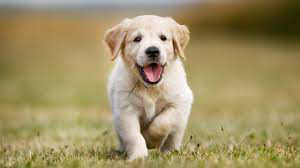

In [7]:
from IPython.display import display
from PIL import Image

path="/Users/User/Downloads/dog.jfif"
display(Image.open(path))

image = Image.open(path)  # Open the image

# Save the opened image as "dog.png" in PNG format
image.save("dog.png", format="PNG")

##### Question 2

In [13]:
!pip install opencv-python

     -------------------------------------- 38.8/38.8 MB 352.7 kB/s eta 0:00:00


In [15]:
# Method 1
import cv2 as cv

color_image_path = '/Users/User/Downloads/soccer.jpg'
grayscale_image_path = cv.cvtColor(cv.imread(color_image_path), cv.COLOR_BGR2GRAY)

# Display the images side-by-side
cv.imshow("Color Image", cv.imread(color_image_path))
cv.imshow("Grayscale Image", grayscale_image_path)

# Wait for a key press to close the windows
cv.waitKey(0)
cv.destroyAllWindows()

print("Images displayed and closed.")

Images displayed and closed.


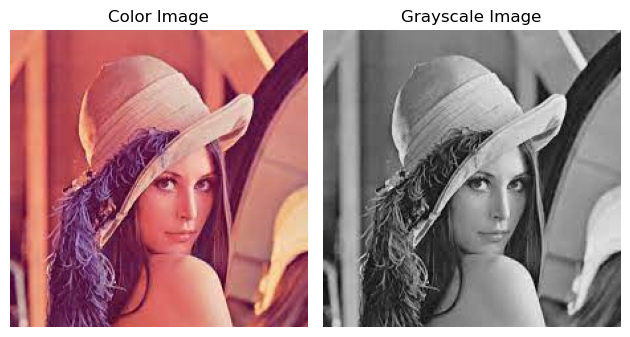

In [24]:
# Method 2
import matplotlib.pyplot as plt
from PIL import Image

# Replace 'path/to/image.jpg' with the actual path to your color image
color_image_path = '/Users/User/Downloads/lena.tif'

# Read the color image
color_image = Image.open(color_image_path)

# Convert the color image to grayscale using a weighted average
def rgb_to_grayscale(image):
  grayscale_image = image.convert('L')  # Convert to grayscale mode 'L'
  return grayscale_image

# Create a grayscale version of the color image
grayscale_image = rgb_to_grayscale(color_image.copy())  # Convert a copy to avoid modifying original

# Create a figure with 1 row and 2 columns
fig, axs = plt.subplots(1, 2)

# Display the color image in the first subplot
axs[0].imshow(color_image)
axs[0].set_title('Color Image')
axs[0].axis('off')  # Hide x and y axes

# Display the grayscale image in the second subplot
axs[1].imshow(grayscale_image, cmap='gray')
axs[1].set_title('Grayscale Image')
axs[1].axis('off')  # Hide x and y axes

# Adjust layout (optional)
fig.tight_layout()

# Display the plot
plt.show()

##### Question 3

In [26]:
import cv2 as cv

# Define video path, output path (with preferred extension), and desired frame size
video_path = '/Users/User/Downloads/img_pexels.mp4'
output_path = "smaller_img_pexels.avi"  # Choose desired output format (avi or mp4)
frame_width = 320  # Adjust width for your desired size
frame_height = 240  # Adjust height for your desired size
fps = 10  # Set the desired frame rate

# Load the video
cap = cv.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error opening video!")
    exit()

# Get video properties (optional for reference)
width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

# Define video writer codec based on chosen output format
fourcc = cv.VideoWriter_fourcc(*'XVID')  # Use 'XVID' for avi, adjust for mp4

# Create video writer object
writer = cv.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Process video frames
while True:
    ret, frame = cap.read()

    # Check if frame is read correctly
    if not ret:
        print("No more frames in video!")
        break

    # Resize the frame
    resized_frame = cv.resize(frame, (frame_width, frame_height))   
    cv.imshow("Resized Video", resized_frame)


    # Write the resized frame to the output video
    writer.write(resized_frame)

# Release resources
cap.release()
writer.release()
cv.destroyAllWindows()

print("Video resized and saved successfully!")

No more frames in video!
Video resized and saved successfully!


##### Question 4

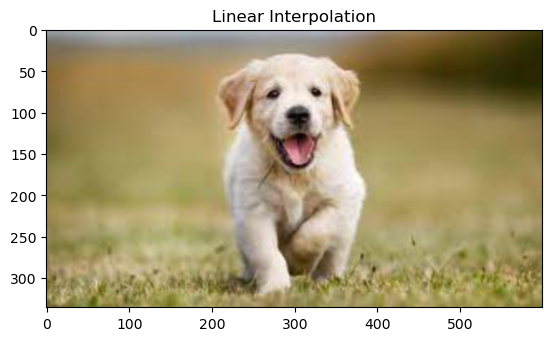

'Execution Time: 0.00354671478271484 seconds'

In [48]:
from PIL import Image
import numpy as np
import time
import matplotlib.pyplot as plt

# Load the image
image_path="/Users/User/Downloads/dog.jfif"
image = Image.open(image_path)

# Define the new size
new_size = (image.size[0] * 2, image.size[1] * 2)

# Linear Interpolation
start_time = time.time()
linear_image = image.resize(new_size, Image.Resampling.BILINEAR)
linear_time = time.time() - start_time

# Display the image
plt.imshow(linear_image)
plt.title('Linear Interpolation')
plt.show()

# Return execution time
linear_time_formatted = f"Execution Time: {linear_time:.17f} seconds"
linear_time_formatted

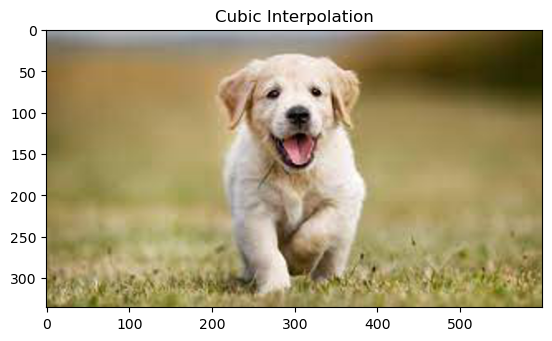

'Execution Time: 0.00233435630798340 seconds'

In [49]:
# Cubic Interpolation
start_time = time.time()
cubic_image = image.resize(new_size, Image.Resampling.BICUBIC)
cubic_time = time.time() - start_time

# Display the image
plt.imshow(cubic_image)
plt.title('Cubic Interpolation')
plt.show()

# Return execution time
cubic_time_formatted = f"Execution Time: {cubic_time:.17f} seconds"
cubic_time_formatted

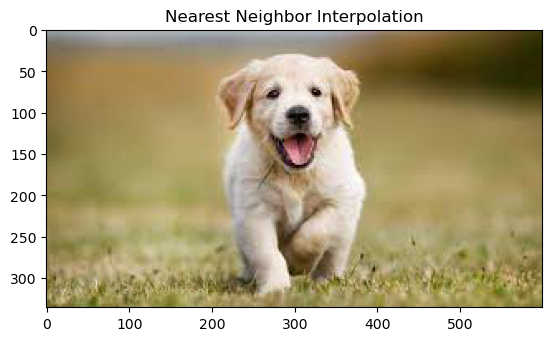

'Execution Time: 0.00132250785827637 seconds'

In [50]:
# Nearest Neighbor Interpolation
start_time = time.time()
nearest_image = image.resize(new_size, Image.Resampling.NEAREST)
nearest_time = time.time() - start_time

# Display the image
plt.imshow(nearest_image)
plt.title('Nearest Neighbor Interpolation')
plt.show()

# Return execution time
nearest_time_formatted = f"Execution Time: {nearest_time:.17f} seconds"
nearest_time_formatted